In [5]:
import sys 
import dlib
import cv2
import os

import matplotlib.pyplot as plt

In [21]:
SRC_PATH = "/Users/samuilstoychev/ckplus_preprocessed/"
DEST_PATH = "/Users/samuilstoychev/ckplus_cropped" 

In [12]:
detector = dlib.get_frontal_face_detector()

In [3]:
def listdir(path):
    """List all items in a given directory (in ascending order)."""
    res = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            res.append(f)
    return sorted(res)

In [8]:
listdir(SRC_PATH + 'train/class_0')

['S005_001_00000001.png',
 'S010_002_00000001.png',
 'S010_004_00000001.png',
 'S011_001_00000001.png',
 'S011_003_00000001.png',
 'S011_004_00000001.png',
 'S011_006_00000001.png',
 'S014_001_00000001.png',
 'S014_002_00000001.png',
 'S014_003_00000001.png',
 'S022_001_00000001.png',
 'S022_005_00000001.png',
 'S022_006_00000001.png',
 'S026_002_00000001.png',
 'S026_003_00000001.png',
 'S026_006_00000001.png',
 'S028_001_00000001.png',
 'S029_001_00000001.png',
 'S032_001_00000001.png',
 'S032_003_00000001.png',
 'S032_004_00000001.png',
 'S032_006_00000001.png',
 'S034_001_00000001.png',
 'S034_003_00000001.png',
 'S034_005_00000001.png',
 'S035_001_00000001.png',
 'S035_005_00000001.png',
 'S035_006_00000001.png',
 'S037_001_00000001.png',
 'S037_003_00000001.png',
 'S037_006_00000001.png',
 'S042_001_00000001.png',
 'S042_002_00000001.png',
 'S042_004_00000001.png',
 'S042_006_00000001.png',
 'S044_001_00000001.png',
 'S044_003_00000001.png',
 'S044_006_00000001.png',
 'S045_005_0

In [31]:
for split in ["train", "test"]: 
    for class_id in ["class_" + str(x) for x in range(8)]: 
        path = "/".join([SRC_PATH, split, class_id])
        dest = "/".join([DEST_PATH, split, class_id])
        image_names = listdir(path)
        for image_name in image_names: 
            img = dlib.load_rgb_image(path + "/" + image_name)
            dets = detector(img, 1)
            crop = img[dets[0].top():dets[0].bottom(), dets[0].left():dets[0].right()]
            # https://stackoverflow.com/questions/42406338/why-cv2-imwrite-changes-the-color-of-pics
            cv2.imwrite(dest + "/" + image_name, cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

In [23]:
img = dlib.load_rgb_image("/Users/samuilstoychev/ckplus_preprocessed/test/class_1/S999_001_00000016.png")

In [24]:
dets = detector(img, 1)

In [25]:
dets

rectangles[[(111, 171) (379, 439)]]

In [26]:
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))

Number of faces detected: 1
Detection 0: Left: 111 Top: 171 Right: 379 Bottom: 439


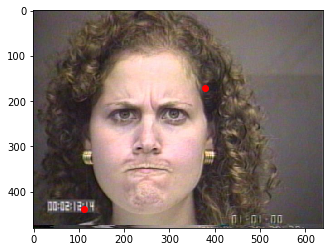

In [27]:
plt.imshow(img)
plt.scatter([dets[0].left(), dets[0].right()], [dets[0].bottom(), dets[0].top()], color="red")

In [28]:
crop = img[dets[0].top():dets[0].bottom(), dets[0].left():dets[0].right()]

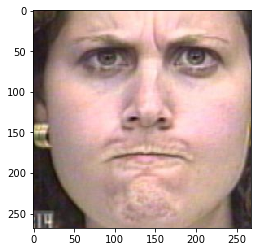

In [29]:
plt.imshow(crop)

In [30]:
cv2.imwrite("/Users/samuilstoychev/Desktop/cropped.jpg", cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

True